In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle
from glob import glob
from pprint import pprint

# set matplotlib style
# plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.utils import util
from mejiro.instruments.hwo import HWO
from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage
from mejiro.galaxy_galaxy import SampleBELLS, SampleSL2S, SampleGG

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.


/data/bwedig/.conda/envs/mejiro-v2/lib/python3.10/site-packages/pysynphot/units.py:824: RuntimeWarning: divide by zero encountered in log
  return -1.085736 * N.log(arg) + ABZERO


Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


In [2]:
strong_lens = SampleGG()

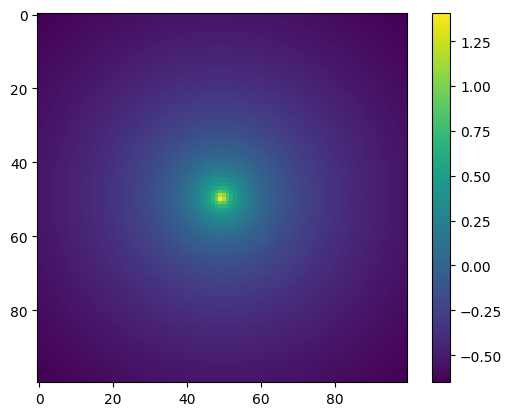

In [3]:
kappa = strong_lens.get_kappa()

plt.imshow(np.log10(kappa))
plt.colorbar()
plt.show()

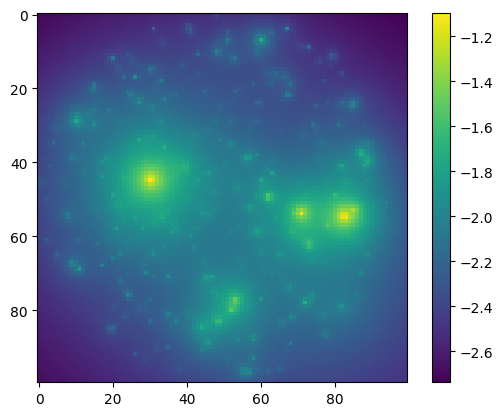

In [6]:
from pyHalo.preset_models import preset_model_from_name

CDM = preset_model_from_name('CDM')
realization = CDM(round(strong_lens.z_lens, 2), round(strong_lens.z_source, 2), cone_opening_angle_arcsec=5, log_m_host=np.log10(strong_lens.get_main_halo_mass()))

strong_lens.add_realization(realization)

realization_kappa = strong_lens.get_realization_kappa(add_mass_sheet_correction=False)
plt.imshow(np.log10(realization_kappa))
plt.colorbar()
plt.show()